# ESM1.6 Scaling

End-to-end pipeline generating scaling plots for ESM1.6 Pre-industrial configuration (WIP).

In [1]:
## Prerequisites

# payu/dev has experiment-generator and experiment-runner built-in, 
# but not access-parsers. Instead of trying to work with your own
# packages/venv and payu/dev module, it's easier to only work with
# the former

# install prerequisites
!pip install -r requirements.txt

  Cloning https://github.com/ACCESS-NRI/access-parsers to /scratch/tm70/ey7514/tmp/pip-req-build-yw_80411
  Running command git clone --filter=blob:none --quiet https://github.com/ACCESS-NRI/access-parsers /scratch/tm70/ey7514/tmp/pip-req-build-yw_80411
  Resolved https://github.com/ACCESS-NRI/access-parsers to commit 2a27d6e102d0e1a2c7319562bf3bccb5ed06e041
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/ACCESS-NRI/access-experiment-generator to /scratch/tm70/ey7514/tmp/pip-req-build-tg4pj1s6
  Running command git clone --filter=blob:none --quiet https://github.com/ACCESS-NRI/access-experiment-generator /scratch/tm70/ey7514/tmp/pip-req-build-tg4pj1s6
  Resolved https://github.com/ACCESS-NRI/access-experiment-generator to commit bf6da53e05fc00fd5d968cc0f893558b108f805d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing meta

## Running model AKA generating scaling data

This uses the experiment generator CLI utility with a config file.

In [2]:
!experiment-generator -i configs/esm1.5.yaml

-- Test directory esm1.5-scaling has been created!
Cloned repository from git@github.com:ACCESS-NRI/access-esm1.5-configs.git to directory: /scratch/tm70/ey7514/scaling/access-models-scaling/esm1.5-scaling/esm1.5_PI_concentrations
Created and checked out new branch: ctrl
laboratory path:  /scratch/tm70/ey7514/access-esm
binary path:  /scratch/tm70/ey7514/access-esm/bin
input path:  /scratch/tm70/ey7514/access-esm/input
work path:  /scratch/tm70/ey7514/access-esm/work
archive path:  /scratch/tm70/ey7514/access-esm/archive
Updated metadata. Experiment UUID: a7d17839-5a92-4184-83e5-536c9173cddb
Added archive symlink to /scratch/tm70/ey7514/access-esm/archive/esm1.5_PI_concentrations-ctrl-a7d17839
To change directory to control directory run:
  cd /scratch/tm70/ey7514/scaling/access-models-scaling/esm1.5-scaling/esm1.5_PI_concentrations
Checked out branch: ctrl
laboratory path:  /scratch/tm70/ey7514/access-esm
binary path:  /scratch/tm70/ey7514/access-esm/bin
input path:  /scratch/tm70/ey7

In [3]:
# generate runner config. It's relatively simple, so writing the config here.
with open("runner.yaml", 'w') as f:
    f.write("""
test_path: esm1.5-scaling/
repository_directory: esm1.5_PI_concentrations
# these branches need to match branches in configs/esm1.5.yaml
running_branches: 
    - 1nodes
    - 3nodes
    - 6nodes
    - 9nodes
    - 18nodes 
keep_uuid: True

# currently nruns != 1 doesn't work.
nruns: [1, 1, 1, 1, 1]
startfrom_restart: [cold, cold, cold, cold, cold]
""")

# use the runner config with experiment-runner
!experiment-runner -i runner.yaml

* Current Branch: 18nodes
    experiment_uuid: af4f554e-27cc-40e6-a2bc-d832f804719e
Branch: 1nodes
    experiment_uuid: 2799db3a-550a-4484-9668-233daf734384
Branch: 3nodes
    experiment_uuid: 8ebc7da9-ef45-458c-ab6e-e4866110c295
Branch: 6nodes
    experiment_uuid: d57f6242-020a-4f6d-9005-022e87f2affc
Branch: 9nodes
    experiment_uuid: fc790216-b44f-4cf7-812e-bf9cb112f668
Branch: ctrl
    experiment_uuid: a7d17839-5a92-4184-83e5-536c9173cddb
Branch: main
    No config file found
-- Cloning branch '1nodes' into esm1.5-scaling/1nodes/esm1.5_PI_concentrations...
Cloned repository from esm1.5-scaling/esm1.5_PI_concentrations to directory: /scratch/tm70/ey7514/scaling/access-models-scaling/esm1.5-scaling/1nodes/esm1.5_PI_concentrations
Checked out branch: 1nodes
laboratory path:  /scratch/tm70/ey7514/access-esm
binary path:  /scratch/tm70/ey7514/access-esm/bin
input path:  /scratch/tm70/ey7514/access-esm/input
work path:  /scratch/tm70/ey7514/access-esm/work
archive path:  /scratch/tm70/ey

After running the experiment, you should have:
* a directory containing branches for each experiment
* a directory for each experiment result
    * the results will be in corresponding 'archive' directories

In [1]:
# you should have:
# * a directory containing branches for each expeiriment
!tree -dL 3 esm1.5-scaling

esm1.5-scaling
├── 18nodes
│   └── esm1.5_PI_concentrations
│       ├── archive -> /scratch/tm70/ey7514/access-esm/archive/esm1.5_PI_concentrations-18nodes-c0335617
│       ├── atmosphere
│       ├── coupler
│       ├── ice
│       ├── manifests
│       ├── ocean
│       ├── scripts
│       ├── testing
│       └── work -> /scratch/tm70/ey7514/access-esm/work/esm1.5_PI_concentrations-18nodes-c0335617
├── 1nodes
│   └── esm1.5_PI_concentrations
│       ├── archive -> /scratch/tm70/ey7514/access-esm/archive/esm1.5_PI_concentrations-1nodes-100636b0
│       ├── atmosphere
│       ├── coupler
│       ├── ice
│       ├── manifests
│       ├── ocean
│       ├── scripts
│       └── testing
├── 3nodes
│   └── esm1.5_PI_concentrations
│       ├── archive -> /scratch/tm70/ey7514/access-esm/archive/esm1.5_PI_concentrations-3nodes-845bd4bf
│       ├── atmosphere
│       ├── coupler
│       ├── ice
│       ├── manifests
│       ├── ocean
│       ├── scripts
│       └── testing
├── 6nodes
│   └── esm1

## Parsing experiment results

We'll use the profiling parsers in access-parsers to do this.

In [2]:
# Draft post-processing functions (these would be put into some sort of module)

from typing import List
from collections.abc import Iterable
from access.parsers.profiling import ProfilingParser
import xarray as xr


def parse_profiling_data(
    logs: List[str], parser: ProfilingParser, varname: str, vars: Iterable
):

    datasets = []
    for var, log in zip(vars, logs):
        data = parser.read(log)
        datasets.append(
            xr.Dataset(
                data_vars=dict(
                    zip(
                        parser.metrics,
                        [
                            xr.DataArray([data[metric]], dims=[varname, "region"])
                            for metric in parser.metrics
                        ],
                    )
                ),
                coords={"region": data["region"], varname: [var]},
            )
        )
    return xr.concat(datasets, dim=varname)


def scaling_speedup(stats: xr.Dataset, metric: str = "tavg") -> xr.Dataset:
    """Calculates the parallel speedup from scaling data.

    Args:
        stats (Dataset): Scaling data, stored as a xarray dataset.

    Returns:
        Dataset: Parallel speedup.
    """
    speedup = stats[metric].sel(ncpus=stats["ncpus"].min()) / stats[metric]
    speedup.name = "speedup"
    return speedup


def scaling_efficiency(stats: xr.Dataset, metric: str = "tavg") -> xr.Dataset:
    """Calculates the parallel efficiency from scaling data.

    Args:
        stats (Dataset): Scaling data, stored as a xarray dataset.

    Returns:
        Dataset: Parallel efficiency.
    """
    speedup = scaling_speedup(stats, metric)
    eff = speedup / speedup.ncpus * 100 * stats["ncpus"].min()
    eff.name = "parallel efficiency [%]"
    return eff

In [10]:
# plotting functions. Might want to keep these in the notebook so they're modifiable by the user?

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def calculate_column_widths(table_data, first_col_flexible=True):
    """
    Calculate column widths based on content length

    Args:
        table_data (List[list]): Table data including headers
        first_col_flexible (bool): If True, first column gets remaining space after others are sized

    Returns:
        list : Column width ratios
    """
    if not table_data:
        return []

    n_cols = len(table_data[0])

    # Calculate max content length for each column
    max_lengths = []
    for col in range(n_cols):
        col_lengths = [len(str(row[col])) for row in table_data]
        max_lengths.append(max(col_lengths))

    if first_col_flexible:
        # Set data columns to proportional widths based on content
        # Give first column remaining space
        data_cols_total = sum(max_lengths[1:])
        base_width = 0.6 / data_cols_total if data_cols_total > 0 else 0.1

        col_widths = [0.4]  # First column gets 40% of space
        for length in max_lengths[1:]:
            col_widths.append(length * base_width)

        # Adjust to sum to 1.0
        current_sum = sum(col_widths)
        col_widths = [w / current_sum for w in col_widths]

        # Give first column any remaining space
        remaining = 1.0 - sum(col_widths[1:])
        col_widths[0] = remaining
    else:
        # Proportional to content length
        total_length = sum(max_lengths)
        col_widths = [length / total_length for length in max_lengths]

    return col_widths


def plot_regions(
    stats: List[xr.Dataset],
    regions: List[List[str]],
    metrics: List[str],
    xcoordinate: str = "ncpus",
):
    """Plots scaling speedup and efficiency from a list of datasets

    Args:
        stats (List[xr.Dataset]): The raw times to plot.
        regions (List[List[str]]): The list of regions to plot.
            regions[0][:] corresponds to regions to plot in stats[0].
        metrics (List[str]): The metrics to plot for each stat.
        xcoordinate (str): The x-axis variable e.g. ncpus.
    """
    # setup plots
    fig = plt.figure(figsize=(15, 6))
    # using gridspec so table can be added
    gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1], hspace=0.3)
    ax1, ax2 = fig.add_subplot(gs[0, 0]), fig.add_subplot(gs[0, 1])
    ax_tbl = fig.add_subplot(gs[1, :])

    # add table of raw timings
    tbl = [[xcoordinate] + list(stats[0][xcoordinate].values)]  # first row
    for stat, region, metric in zip(stats, regions, metrics):

        # calculate efficiency and speedup
        efficiency = scaling_efficiency(stat, metric)
        speedup = scaling_speedup(stat, metric)

        # plots speedup and efficiency on their respective axes.
        max_eff = 100
        for r in region:
            speedup.loc[r, :].plot.line(x=xcoordinate, ax=ax1, marker="o", label=r)
            efficiency.loc[r, :].plot.line(x=xcoordinate, ax=ax2, marker="o", label=r)
            # find max efficiency for setting efficiency axis
            max_eff = max(max_eff, efficiency.loc[r, :].max())

        tbl.append([region] + [f"{val:.2f}" for val in stat[metric].loc[:, r].values])

    # ideal speedup/scaling
    minx = stat[xcoordinate].values.min()
    nx = len(stat[xcoordinate].values)
    ideal_speedups = [i / minx for i in stat[xcoordinate].values]
    ax1.plot(stat[xcoordinate].values, ideal_speedups, "k:", label="ideal")
    ax2.plot(stat[xcoordinate].values, [100] * nx, "k:", label="ideal")

    # formatting
    ax1.legend()
    ax1.grid()
    ax2.grid()
    ax2.set_ylim((0, 1.1 * max_eff))
    ax1.set_title("Scaling Speedup")
    ax2.set_title("Scaling Efficiency")
    ax_tbl.axis("off")
    tbl_chart = ax_tbl.table(
        tbl,
        bbox=(0.05, 0, 0.9, 1),
        cellLoc="center",
        colWidths=calculate_column_widths(tbl),
    )
    ax_tbl.set_title("Timings (s)")
    for i in range(len(tbl[0])):
        tbl_chart[(0, i)].set_text_props(weight="bold")
    for i in range(len(tbl)):
        tbl_chart[(i, 0)].set_text_props(weight="bold")

In [3]:
# Start by processing FMS (MOM5) results
from access.parsers.fms_profiling import FMSProfilingParser
from access.parsers.payujson_profiling import PayuJSONProfilingParser
fmsparser = FMSProfilingParser(has_hits=False)
payuparser = PayuJSONProfilingParser()

In [5]:
# Processing logs
from pathlib import Path
import glob

fmslogs = []
payulogs = []
for nnodes in (1, 3, 6, 9):
    archive_dir = f"esm1.5-scaling/{nnodes}nodes/esm1.5_PI_concentrations/archive"
    with open(archive_dir + "/output000/access.out", "r") as f:
        fmslogs.append(f.read())
    payulog = glob.glob(archive_dir + "/payu_jobs/0/run/*.gadi-pbs.json")[0]
    with open(payulog, "r") as f:
        payulogs.append(f.read())

In [6]:
fmsstats = parse_profiling_data(
    fmslogs,
    fmsparser,
    "ncpus",
    [48, 144, 288, 432]
)
fmsstats

<xarray.Dataset> Size: 67kB
Dimensions:  (ncpus: 4, region: 175)
Coordinates:
  * region   (region) <U32 22kB 'Total runtime' 'Ocean' ... 'oasis_send'
  * ncpus    (ncpus) int64 32B 48 144 288 432
Data variables:
    tmin     (ncpus, region) float64 6kB 3.41e+04 3.395e+04 ... 123.2 1.231
    tmax     (ncpus, region) float64 6kB 3.41e+04 3.397e+04 ... 257.2 1.692
    tavg     (ncpus, region) float64 6kB 3.41e+04 3.397e+04 ... 169.9 1.344
    tstd     (ncpus, region) float64 6kB 0.0 5.023 0.00729 ... 56.84 0.1078
    tfrac    (ncpus, region) float64 6kB 1.0 0.996 0.0 0.0 ... 0.0 0.0 0.044 0.0
    grain    (ncpus, region) int64 6kB 0 1 11 11 31 31 31 ... 31 41 41 1 31 31
    pemin    (ncpus, region) int64 6kB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    pemax    (ncpus, region) int64 6kB 19 19 19 19 19 19 ... 179 179 179 179 179

In [7]:
# first 10 regions
fmsstats.region[:10]

<xarray.DataArray 'region' (region: 10)> Size: 1kB
array(['Total runtime', 'Ocean', '(Ocean initialization)', '(Ocean ODA)',
       '(Red Sea/Gulf Bay salinity fix)', '(Ocean advection velocity)',
       '(Ocean density diag)', '(Ocean update density)',
       '(Ocean vertical mixing coeff)', '(Ocean neutral physics)'],
      dtype='<U32')
Coordinates:
  * region   (region) <U32 1kB 'Total runtime' ... '(Ocean neutral physics)'

In [8]:
payustats = parse_profiling_data(
    payulogs,
    payuparser,
    "ncpus",
    [48, 144, 288, 432]
)
payustats.region

<xarray.DataArray 'region' (region: 5)> Size: 620B
array(['payu_setup_duration_seconds', 'payu_model_run_duration_seconds',
       'payu_run_duration_seconds', 'payu_archive_duration_seconds',
       'payu_total_duration_seconds'], dtype='<U31')
Coordinates:
  * region   (region) <U31 620B 'payu_setup_duration_seconds' ... 'payu_total...

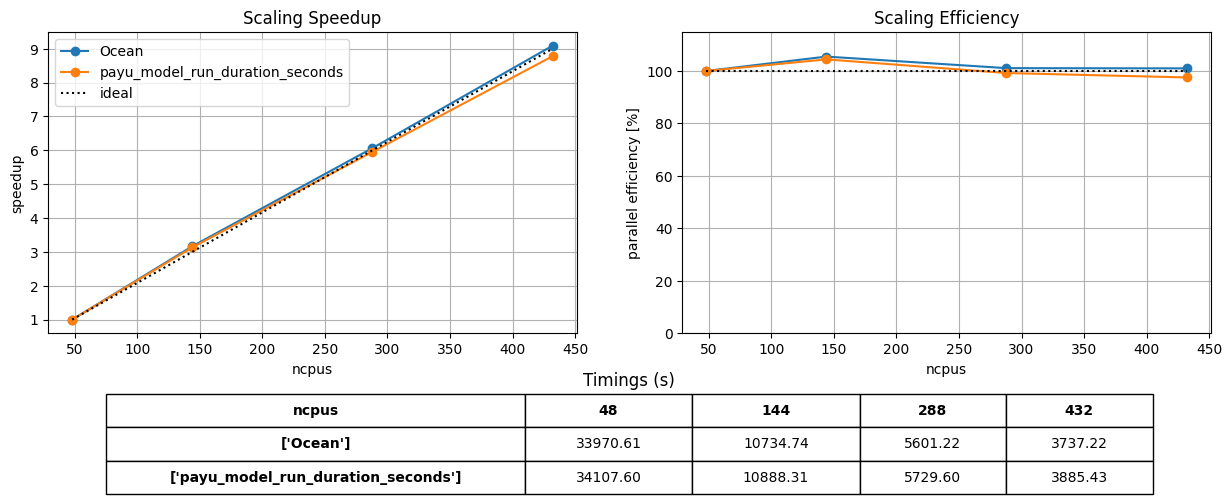

In [ ]:
# plots the Ocean region and tmax metric from the FMS stats, and 
# payu_model_run_duration_seconds region and walltime metric from payu stats.
plot_regions(
    stats=[fmsstats, payustats], 
    regions=[
        ["Ocean"], 
        ["payu_model_run_duration_seconds"]
    ], 
    metrics=["tmax", "walltime"]
)